In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('curvefit_cs137_data.csv')

df.head()

x = df.Channel

y = df.Cs137

x,y

(0          0
 1          1
 2          2
 3          3
 4          4
         ... 
 2043    2043
 2044    2044
 2045    2045
 2046    2046
 2047    2047
 Name: Channel, Length: 2048, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 2043    0
 2044    0
 2045    0
 2046    0
 2047    0
 Name: Cs137, Length: 2048, dtype: int64)

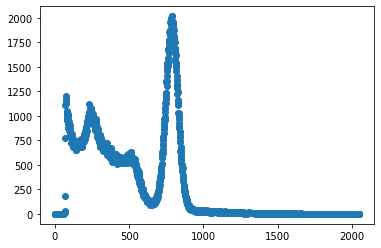

In [7]:
plt.scatter(x, y)

This is a Gaussian so we fit it with a Gaussian curve 

In [8]:
def gauss_f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/sig**2)

In [9]:
x_data = x[(x>725) & (x<850)]
y_data = y[(x>725) & (x<850)]

#Plot the subregion

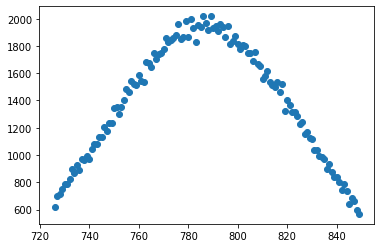

In [10]:
plt.scatter(x_data, y_data)
plt.show()


In [24]:
import numpy as np
from scipy.optimize import curve_fit
popt, pcov = curve_fit(gauss_f, x_data, y_data, p0=[2000, 790, 60])

In [25]:
popt #gives the optimal parameters for the model given the data

array([1939.55510386,  786.33851861,   57.78717218])

In [26]:
pcov  #the covariance matrix, which gives an estimate of the "error" of the parameters and the relation the parameters have to eachother 

array([[ 3.25193916e+01,  1.08041870e-02, -9.64139417e-01],
       [ 1.08041870e-02,  2.07415740e-02, -1.14109425e-03],
       [-9.64139417e-01, -1.14109425e-03,  6.98395032e-02]])

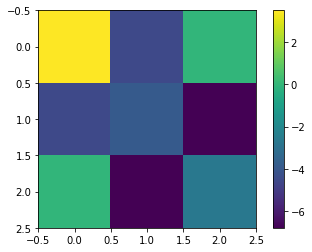

In [27]:
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

In [41]:
A_opt, mu_opt, sig_opt = popt
x_model = np.linspace(min(x_data), max(x_data ), 1000)
y_model = gauss_f(x_model, A_opt, mu_opt, sig_opt)


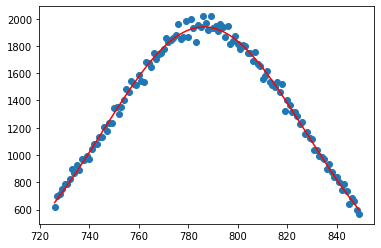

In [42]:
plt.scatter(x_data, y_data)
plt.plot(x_model, y_model, color='r')
plt.show()

In [43]:
popt

array([1939.55510386,  786.33851861,   57.78717218])

In [44]:
np.sqrt(np.diag(pcov))

array([5.70257763, 0.14401935, 0.26427165])

In [46]:
yerr_data = np.sqrt(y_data)

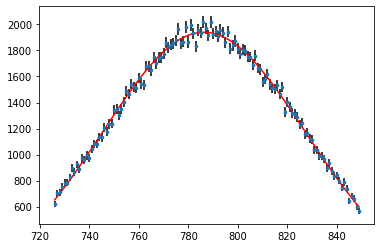

In [48]:
plt.errorbar(x_data, y_data, yerr_data, ls='', color='k')
plt.scatter(x_data, y_data, s=7, zorder=1000)
plt.plot(x_model, y_model, color='r')
plt.show()

In [49]:
popt

array([1939.55510386,  786.33851861,   57.78717218])

In [50]:
np.sqrt(np.diag(pcov)) #diagionalization of covariance matrix

array([5.70257763, 0.14401935, 0.26427165])